In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
file_name = "IMG_5151.JPG"
image = cv2.imread(file_name)

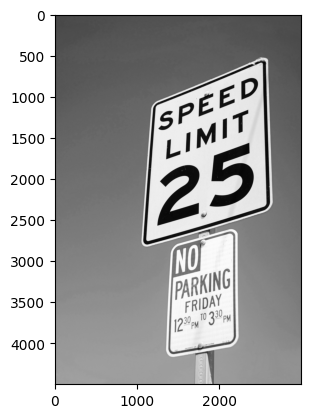

In [76]:
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)#32 bit float
R, G, B = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]
gray_manual = (0.2989*R + 0.5870*G + 0.1140*B).astype(np.uint8)
plt.imshow(gray_manual, cmap="gray")

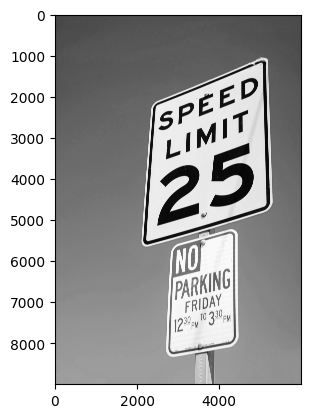

In [77]:
rescaled = cv2.resize(gray_manual,None,fx=2.0,fy=2.0,interpolation=cv2.INTER_CUBIC)
plt.imshow(rescaled, cmap="gray")
#like zooming a blurry image

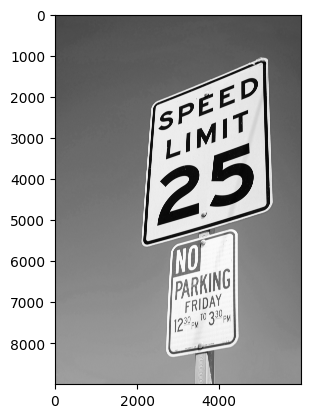

In [78]:
denoised = cv2.GaussianBlur(rescaled,(3, 3),0)
plt.imshow(denoised, cmap="gray")

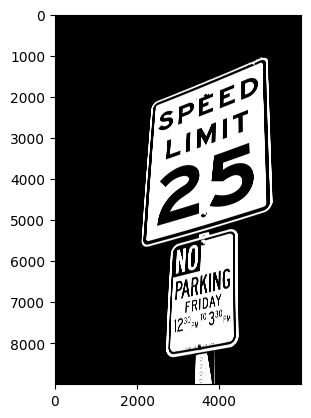

In [79]:
_, thresh = cv2.threshold(denoised,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")
#proper contrast between edge and background
#uniform background so use global thresholding

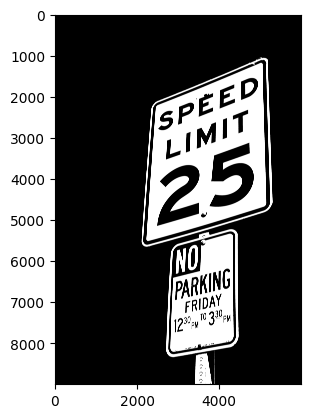

In [80]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
eroded = cv2.erode(thresh, kernel, iterations=1)
plt.imshow(eroded, cmap="gray")


In [81]:
!apt-get update
!apt-get install -y tesseract-ocr


Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 7,549 B in 1s (5,947 B/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest vers

In [82]:
!pip install pytesseract


In [83]:
import pytesseract

config = "--oem 3 --psm 6"
predicted_text = pytesseract.image_to_string(eroded, config=config)

predicted_text = " ".join(predicted_text.split())
print(predicted_text)



speee 35 fw PARKING FRIDAY a 3 -


In [84]:
!pip install jiwer

In [85]:
gt="SPEED LIMIT 25 NO PARKING FRIDAY 12 30 PM TO 330 PM"
from jiwer import wer, cer
pred = predicted_text

cer1= cer(gt, pred)
wer1= wer(gt, pred)
print("CER:", cer1)
print("WER:", wer1)

CER: 0.5686274509803921
WER: 0.8333333333333334


In [86]:
file_name = "IMG_5152.PNG"
image = cv2.imread(file_name)

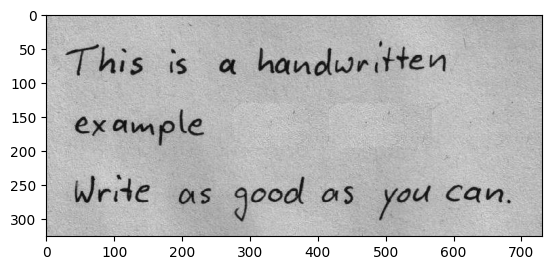

In [87]:
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
R, G, B = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]
gray_manual = (0.2989*R + 0.5870*G + 0.1140*B).astype(np.uint8)
plt.imshow(gray_manual, cmap="gray")

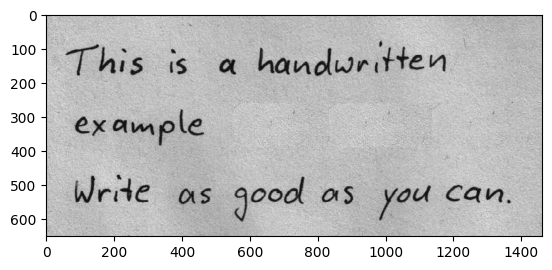

In [88]:
rescaled = cv2.resize(gray_manual,None,fx=2.0,fy=2.0,interpolation=cv2.INTER_CUBIC)
plt.imshow(rescaled, cmap="gray")

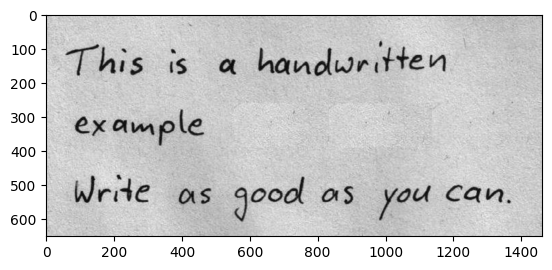

In [89]:
denoised = cv2.GaussianBlur(rescaled,(3, 3),0)
plt.imshow(denoised, cmap="gray")

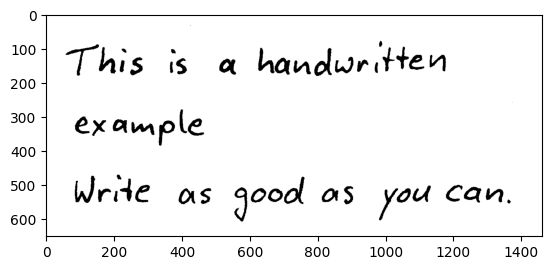

In [90]:
_, thresh = cv2.threshold(denoised,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")

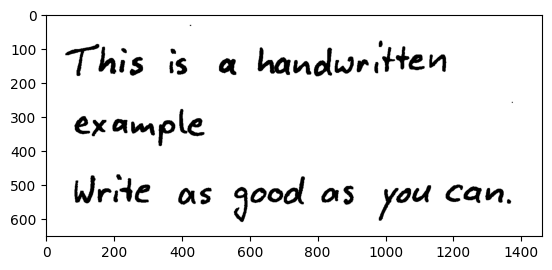

In [91]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
eroded = cv2.erode(thresh, kernel, iterations=1)
plt.imshow(eroded, cmap="gray")

In [92]:
import pytesseract

config = "--oem 3 --psm 6"
predicted_text = pytesseract.image_to_string(eroded, config=config)

predicted_text = " ".join(predicted_text.split())
print(predicted_text)

This is a handwritten example | Write as qoool as you Can,


In [93]:
gt2="This is a handwritten example Write as good as you can."
pred2 = predicted_text
cer2= cer(gt2, pred2)
wer2= wer(gt2, pred2)

print("CER:", cer2)
print("WER:", wer2)

CER: 0.12727272727272726
WER: 0.2727272727272727


mn are | ) NS SS 5 A i oy ie « ; eee Sy aan ~."2 . “* be WASH 4 . a (& ~y PR 1 has gz n 4 F we ‘Qa > ihe ‘ tey* 0 eae Nb y's 4 = Ae -e TANGY ..* oe art BN es a) “> “wagon ays =A", Sve vt. té Slee “k koe a® we 26 eo we eo7k “0 iy Va oN tetR Th hee tre Ka LETS ts 4° "st °e 4% ~~ E ~* (= 42 ~ te ao N&e oA lh. was O% xt Nt we Yeas is 3 PAG - ae Be — 3%, a, iJ >“ a’ EAs bead te uO, of on a’ - 4 el A iY Aa oe , sa Las ae | ; a we 4, iL ad Y*e, ro cl it ay ¥ a.3‘™™\ Ve an? ane = 3% al . 6 Kv weg & Se a $ ‘ A Va x whe me ON fon ~ as LX Cesky) wea Wh he Lao Ws s orn why ry res v Moe oa ‘3 ee Va an aL ro ge we 47 = at ey “nate 8 S ba Pate ame ry TMT \: “an “iy ty of ahs . i Pia 2g ay a a sas af 3. iF uhh wa “oe & 1 mY “3 \. >’ N cv iY _* A 8 ae a ot b. i As e ' 4). ee a bee s aN ah | wD Pott ip rt’ a . otk Ac Wy a a ro ve wh whi ia >? re. ame a vt oS o7 fa yh a ¥ wAA oe Ve ots, oe ~~ 4S aS: wa ws Pai S2 oP I f! e™N ae ° ’ . Suess rv) yt hy > ' = 14 te Ee yus Cae to bat = yy ete we if v} So a-t s

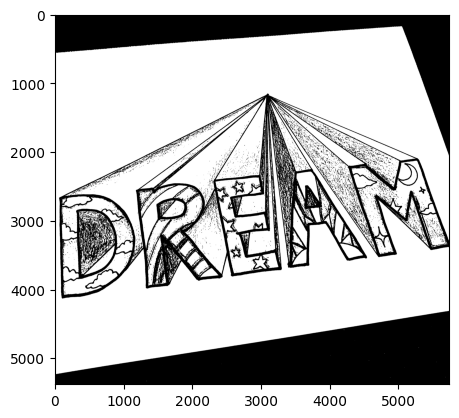

In [96]:
file_name = "IMG_5153.JPG"
image = cv2.imread(file_name)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
R, G, B = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]
gray_manual = (0.2989*R + 0.5870*G + 0.1140*B).astype(np.uint8)
rescaled = cv2.resize(gray_manual,None,fx=2.0,fy=2.0,interpolation=cv2.INTER_CUBIC)
denoised = cv2.GaussianBlur(rescaled,(3, 3),0)
_, thresh = cv2.threshold(denoised,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
eroded = cv2.erode(thresh, kernel, iterations=1)
plt.imshow(eroded, cmap="gray")
import pytesseract

config = "--oem 3 --psm 11"
predicted_text = pytesseract.image_to_string(eroded, config=config)

predicted_text = " ".join(predicted_text.split())
print(predicted_text)
gt3="DREAM"
pred3 = predicted_text

cer3= cer(gt3, pred3)
wer3= wer(gt3, pred3)

print("CER:", cer3)
print("WER:", wer3)


CER: 1.0
WER: 1.0


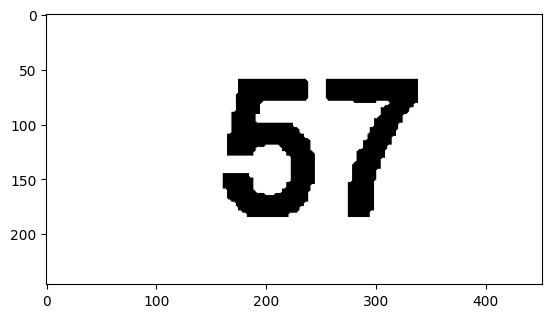

In [97]:
file_name = "IMG_5154.JPG"
image = cv2.imread(file_name)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
R, G, B = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]
gray_manual = (0.2989*R + 0.5870*G + 0.1140*B).astype(np.uint8)
rescaled = cv2.resize(gray_manual,None,fx=2.0,fy=2.0,interpolation=cv2.INTER_CUBIC)
denoised = cv2.GaussianBlur(rescaled,(3, 3),0)
_, thresh = cv2.threshold(denoised,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
eroded = cv2.erode(thresh, kernel, iterations=1)
plt.imshow(eroded, cmap="gray")
import pytesseract

config = "--oem 3 --psm 7 -c tessedit_char_whitelist=0123456789"
predicted_text = pytesseract.image_to_string(eroded, config=config)

predicted_text = " ".join(predicted_text.split())
print(predicted_text)
gt4="57"
pred4 = predicted_text

cer4= cer(gt4, pred4)
wer4= wer(gt4, pred4)

print("CER:", cer4)
print("WER:", wer4)

In [99]:
cer=(cer1+cer2+cer4+1)/4
wer=(wer1+wer2+wer4+1)/4
print("CER:", cer)
print("WER:", wer)

CER: 0.6739750445632798
WER: 0.7765151515151515
